In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置Seaborn样式和字体
sns.set_theme(style="white")
sns.set_context("paper", font_scale=1.5)
plt.rcParams['font.family'] = 'Arial'

## bar

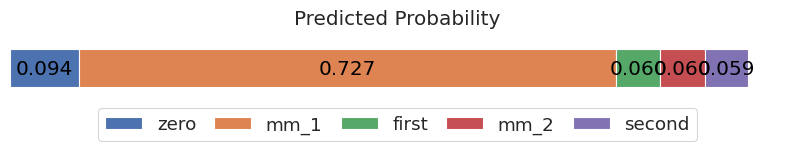

In [63]:
sns.set_theme(style="white")
sns.set_context("paper", font_scale=1.5)
# no boundary
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False


data = {
    'zero': [0.094],
    'mm_1': [0.727],
    'first': [0.060],
    'mm_2': [0.060],
    'second': [0.059],
}

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(10, 1))
df.plot(kind='barh', stacked=True, ax=ax, 
        # colormap="Set2"
        )
# 添加数值标签
for i in range(len(df)):
    # 计算每个条形顶部的累计值
    width_sum = 0
    for j, column in enumerate(df.columns):
        width_sum += df.iloc[i, j]
        # 在每个条形的顶部添加标签
        ax.text(width_sum - df.iloc[i, j] / 2, i, 
                f'{df.iloc[i, j]:.3f}', 
                ha='center', va='center', color='black')
        
# ax.set_title('Stacked Bar Chart of Predicted Probabilities')
ax.set_xlabel('Predicted Probability')
plt.gca().xaxis.set_label_position('top')
# ax.set_ylabel('Samples')
# no xticks
ax.set_xticks([])
# no yticks
ax.set_yticks([])
# 横向的legend
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=5, columnspacing=1)

plt.show()


## hist

/tmp/ipykernel_1191009/1426432707.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Probability', data=df_long,


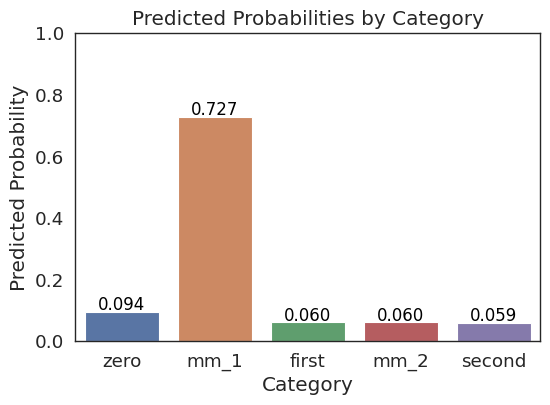

In [78]:
sns.set_theme(style="white")
sns.set_context("paper", font_scale=1.5)
# no boundary
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.bottom'] = False
# plt.rcParams['axes.spines.left'] = False


data = {
    'zero': [0.094],
    'mm_1': [0.727],
    'first': [0.060],
    'mm_2': [0.060],
    'second': [0.059],
}

df = pd.DataFrame(data)

# 将数据从wide-form转换为long-form
df_long = df.melt(var_name='Category', value_name='Probability')

# 创建柱状图
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Category', y='Probability', data=df_long,
             palette='deep'
             )

# 设置标题和标签
plt.title('Predicted Probabilities by Category')
plt.xlabel('Category')
plt.ylabel('Predicted Probability')
plt.ylim(0, 1)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
    
# 显示图形
# plt.tight_layout()
plt.show()

## pie

In [2]:

# 设置Seaborn样式和字体
sns.set_theme(style="white")
sns.set_context("paper", font_scale=1.5)
plt.rcParams['font.family'] = 'Arial'


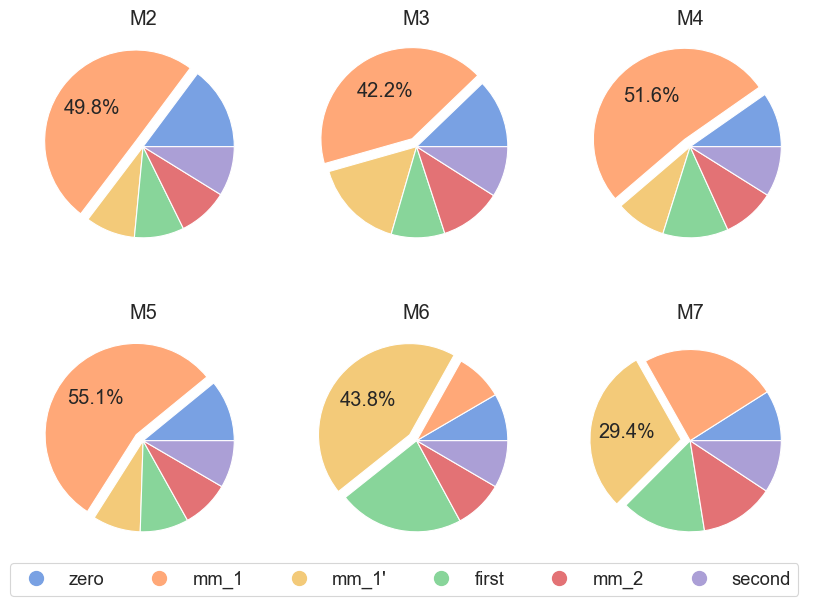

In [3]:
def draw_subpie_6class(text, axes, idx, title):
    text_list = [i.strip() for i in text.split() if i.strip()]
    data_keys = text_list[::2]
    data_values = text_list[1::2]
    data = {data_keys[i]: [float(data_values[i])] for i in range(len(data_keys))}

    # 转换为DataFrame
    df = pd.DataFrame(data)
    df = df[['zero', 'mm_1', "mm_1'", 'first', 'mm_2', 'second']]

    # 提取数据
    sizes = df.iloc[0]   # 概率值
    explode = [0.1 if i == max(sizes) else 0 for i in sizes]  # 将最大值突出显示

    # 在第一个子图中绘制饼图
    axes[idx].pie(
        sizes,
        autopct=lambda pct: autopct_only_max(pct, sizes),
        startangle=0,
        colors=colors,
        explode=explode
    )
    axes[idx].set_title(title)

def autopct_only_max(pct, sizes):
    # print(pct)
    total = sum(sizes)
    value = round(pct * total / 100.0, 3)
    if value == max(sizes):  # 仅显示最大值的标签
        return f'{pct:.1f}%'
    else:
        return ''

# 设置饼图的颜色
colors = ['#79A1E3', '#FFA878', '#F3CA79', '#88D59A', '#E37275', '#AB9FD6']

# 创建 6 个子图
# fig, axes = plt.subplots(1, 6, figsize=(18, 5), dpi=100)
fig, axes = plt.subplots(2, 3, figsize=(10, 7), dpi=100)
axes = axes.flatten()  # 将 2D 数组展平为 1D，便于索引
labels = ['zero', 'mm_1', "mm_1'", 'first', 'mm_2', 'second']

# 第一个饼图的数据
text = '''
mm_1
0.498 
zero
0.148 
mm_2
0.089 
second
0.088 
first
0.088 
mm_1'
0.088 
'''
draw_subpie_6class(text, axes, 0, 'M2')

# 第二个饼图的数据
text = '''
mm_1
0.422 
mm_1'
0.161 
zero
0.122 
mm_2
0.110 
first
0.095 
second
0.090 
'''
draw_subpie_6class(text, axes, 1, 'M3')



text = '''
mm_1
0.515 
first
0.116 
zero
0.097 
mm_2
0.093 
second
0.089 
mm_1'
0.089  
'''
draw_subpie_6class(text, axes, 2, 'M4')


text = '''
mm_1
0.551 
zero
0.109 
first
0.086 
mm_1'
0.085 
mm_2
0.085 
second
0.084 
'''
draw_subpie_6class(text, axes, 3, 'M5')

text = '''
mm_1'
0.438 
first
0.222 
mm_2
0.087 
mm_1
0.085 
second
0.084 
zero
0.084 
'''
draw_subpie_6class(text, axes, 4, 'M6')

text = '''
mm_1'
0.294 
mm_1
0.242 
first
0.150 
mm_2
0.132 
second
0.093 
zero
0.090 
'''
draw_subpie_6class(text, axes, 5, 'M7')

# 添加图例到整个图表
fig.legend(
    handles=[plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10) for color in colors],
    labels=labels,
    loc='lower center',           # 图例放在底部
    bbox_to_anchor=(0.5, 0.05),   # 图例位置在底部中心
    ncol=6                        # 图例分成 6 列
)
# plt.tight_layout()
plt.show()


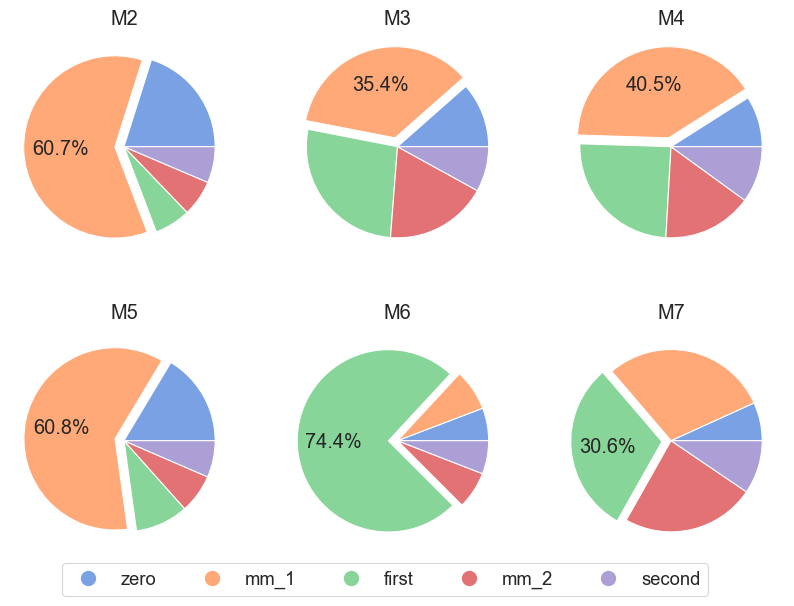

In [47]:
# 绘制饼图
figs, axes = plt.subplots(2, 3, figsize=(10, 7), dpi=100)
axes = axes.flatten()
# colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#64b5cd','#17becf']
colors = ['#79A1E3', '#FFA878', '#88D59A', '#E37275', '#AB9FD6']

def draw_subpie_5class(text, axes, idx, title):
    text_list = [i.strip() for i in text.split() if i.strip()]
    data_keys = text_list[::2]
    data_values = text_list[1::2]
    data = {data_keys[i]: [float(data_values[i])] for i in range(len(data_keys))}

    # 转换为DataFrame
    df = pd.DataFrame(data)
    df = df[['zero', 'mm_1', 'first', 'mm_2', 'second']]

    # 提取数据
    sizes = df.iloc[0]   # 概率值
    explode = [0.1 if i == max(sizes) else 0 for i in sizes]  # 将最大值突出显示

    # 在第一个子图中绘制饼图
    axes[idx].pie(
        sizes,
        autopct=lambda pct: autopct_only_max(pct, sizes),
        startangle=0,
        colors=colors,
        explode=explode
    )
    axes[idx].set_title(title)

text = '''
mm_1
0.606 
zero
0.201 
mm_2
0.064 
first
0.064 
second
0.064  
'''
draw_subpie_5class(text, axes, 0, 'M2')


text = '''
mm_1
0.354 
first
0.268 
mm_2
0.182 
zero
0.115 
second
0.080 
'''
draw_subpie_5class(text, axes, 1, 'M3')


text = '''
mm_1
0.405 
first
0.246 
mm_2
0.159 
second
0.100 
zero
0.090 
'''
draw_subpie_5class(text, axes, 2, 'M4')


text = '''
mm_1
0.608 
zero
0.164 
first
0.094 
mm_2
0.069 
second
0.065 
'''
draw_subpie_5class(text, axes, 3, 'M5')


text = '''
first
0.744 
mm_1
0.073 
mm_2
0.066 
second
0.059 
zero
0.058 
'''
draw_subpie_5class(text, axes, 4, 'M6')


text = '''
first
0.306 
mm_1
0.295 
mm_2
0.237 
second
0.095 
zero
0.068 
'''
draw_subpie_5class(text, axes, 5, 'M7')

labels = ['zero', 'mm_1', 'first', 'mm_2', 'second']
# 添加图例到整个图表
figs.legend(
    handles=[plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10) for color in colors],
    labels=labels,
    loc='lower center',           # 图例放在底部
    bbox_to_anchor=(0.5, 0.05),   # 图例位置在底部中心
    ncol=5                       # 图例分成 6 列
)

plt.show()
# plt.savefig("figure5c_pie.pdf", format='pdf', dpi=300)

## curve pie

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

def time_conc_curve_fit(time, conc, max_degree=3, verbose=False):

    for degree in range(1, max_degree+1):
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        time_poly = poly_features.fit_transform(time.reshape(-1, 1))

        # 多项式回归模型
        model = LinearRegression()
        model.fit(time_poly, conc)

        # 预测结果
        time_plot = time.reshape(-1, 1)
        time_plot_poly = poly_features.transform(time_plot)
        conc_plot = model.predict(time_plot_poly)

        mse = mean_squared_error(conc, conc_plot)
        if degree == 1:
            best_mse = mse
            best_degree = degree
            best_model = model
        else:
            if mse < best_mse:
                best_mse = mse
                best_degree = degree
                best_model = model
    if verbose:
        print('best degree:', best_degree)
        print('best mse:', best_mse)

    return best_model, best_degree


def generate_time_conc_curve(
    time, 
    conc,
    max_degree=4,
    plot_fit_str: str | None = None, 
    verbose = False,
    fit=True,
):
    if fit:
        model, degree = time_conc_curve_fit(time, conc, max_degree=max_degree, verbose=verbose)
        time_point = np.linspace(time.min(), time.max(), 30)
        conc_point = model.predict(PolynomialFeatures(degree=degree, include_bias=False).fit_transform(time_point.reshape(-1, 1)))
        # conc_point = model.predict(time_point.reshape(-1, 1))
        # conc_point = model.predict(time_point[1:-1].reshape(-1, 1))
        # conc_point = np.concatenate((conc[0:1], conc_point, conc[-1:]))
        if plot_fit_str:
            sns.scatterplot(x=time, y=conc, label=f'{plot_fit_str}')
            sns.lineplot(x=time_point, y=conc_point, label=f'{plot_fit_str}_fit')
        return time_point, conc_point
    else:
        # reserve 30 point averagely
        time_point = np.linspace(time.min(), time.max(), 30)
        conc_point = np.interp(time_point, time, conc)
        if plot_fit_str:
            sns.scatterplot(x=time, y=conc, label=f'{plot_fit_str}')
            sns.lineplot(x=time_point, y=conc_point, label=f'{plot_fit_str}_fit')
        return time_point, conc_point
    

def autopct_only_max(pct, sizes):
    # print(pct)
    total = sum(sizes)
    value = round(pct * total / 100.0, 3)
    if value == max(sizes):  # 仅显示最大值的标签
        return f'{pct:.1f}%'
    else:
        return ''

In [5]:
df_paper = pd.read_csv('experiments/Ye_Paper.csv')
sp_mode = 's'

time_M2 = normalize(df_paper['time'].dropna().values)
s_conc_M2 = (df_paper['S'].dropna().values - df_paper['S'].dropna().values[-1]) / (df_paper['S'].dropna().values[0] - df_paper['S'].dropna().values[-1])

time_M3 = normalize(df_paper['time.1'].dropna().values)
s_conc_M3 = (df_paper['S.1'].dropna().values - df_paper['S.1'].dropna().values[-1]) / (df_paper['S.1'].dropna().values[0] - df_paper['S.1'].dropna().values[-1])

time_M4 = normalize(df_paper['time.2'].dropna().values)
s_conc_M4 = (df_paper['S.2'].dropna().values - df_paper['S.2'].dropna().values[-1]) / (df_paper['S.2'].dropna().values[0] - df_paper['S.2'].dropna().values[-1])

time_M5 = normalize(df_paper['time.3'].dropna().values)
s_conc_M5 = (df_paper['S.3'].dropna().values - df_paper['S.3'].dropna().values[-1]) / (df_paper['S.3'].dropna().values[0] - df_paper['S.3'].dropna().values[-1])

time_M6 = normalize(df_paper['time.4'].dropna().values)
s_conc_M6 = (df_paper['S.4'].dropna().values - df_paper['S.4'].dropna().values[-1]) / (df_paper['S.4'].dropna().values[0] - df_paper['S.4'].dropna().values[-1])

time_M7 = normalize(df_paper['time.5'].dropna().values)
s_conc_M7 = (df_paper['S.5'].dropna().values - df_paper['S.5'].dropna().values[-1]) / (df_paper['S.5'].dropna().values[0] - df_paper['S.5'].dropna().values[-1])

time_M1 = normalize(df_paper['time.6'].dropna().values)
s_conc_M1 = (df_paper['S.6'].dropna().values - df_paper['S.6'].dropna().values[-1]) / (df_paper['S.6'].dropna().values[0] - df_paper['S.6'].dropna().values[-1])

In [7]:
pie_data = {}
def get_pie_data(text, key):
    text_list = [i.strip() for i in text.split() if i.strip()]
    data_keys = text_list[::2]
    data_values = text_list[1::2]
    data = {data_keys[i]: [float(data_values[i])] for i in range(len(data_keys))}
    df = pd.DataFrame(data)
    df = df[['zero', 'mm_1', 'mm_1\'', 'first', 'mm_2', 'second']]
    pie_data[key] = df.iloc[0].tolist()

text = '''
mm_1
0.382 
zero
0.261 
mm_2
0.089 
second
0.089 
mm_1_out
0.089 
first
0.089 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M2')

text = '''
mm_1
0.543 
mm_1_out
0.114 
zero
0.088 
mm_2
0.085 
first
0.085 
second
0.085 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M3')

text = '''
mm_1
0.582 
zero
0.088 
mm_1_out
0.086 
mm_2
0.081 
second
0.081 
first
0.081 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M4')

text = '''
mm_1
0.391 
zero
0.274 
mm_2
0.084 
mm_1_out
0.084 
second
0.084 
first
0.084 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M5')

text = '''
mm_1_out
0.428 
first
0.233 
mm_2
0.086 
mm_1
0.085 
second
0.084 
zero
0.084 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M6')

text = '''
mm_1_out
0.478 
first
0.179 
mm_2
0.088 
mm_1
0.086 
second
0.085 
zero
0.084 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M7')

pie_data

{'M2': [0.261, 0.382, 0.089, 0.089, 0.089, 0.089],
 'M3': [0.088, 0.543, 0.114, 0.085, 0.085, 0.085],
 'M4': [0.088, 0.582, 0.086, 0.081, 0.081, 0.081],
 'M5': [0.274, 0.391, 0.084, 0.084, 0.084, 0.084],
 'M6': [0.084, 0.085, 0.428, 0.233, 0.086, 0.084],
 'M7': [0.084, 0.086, 0.478, 0.179, 0.088, 0.085]}

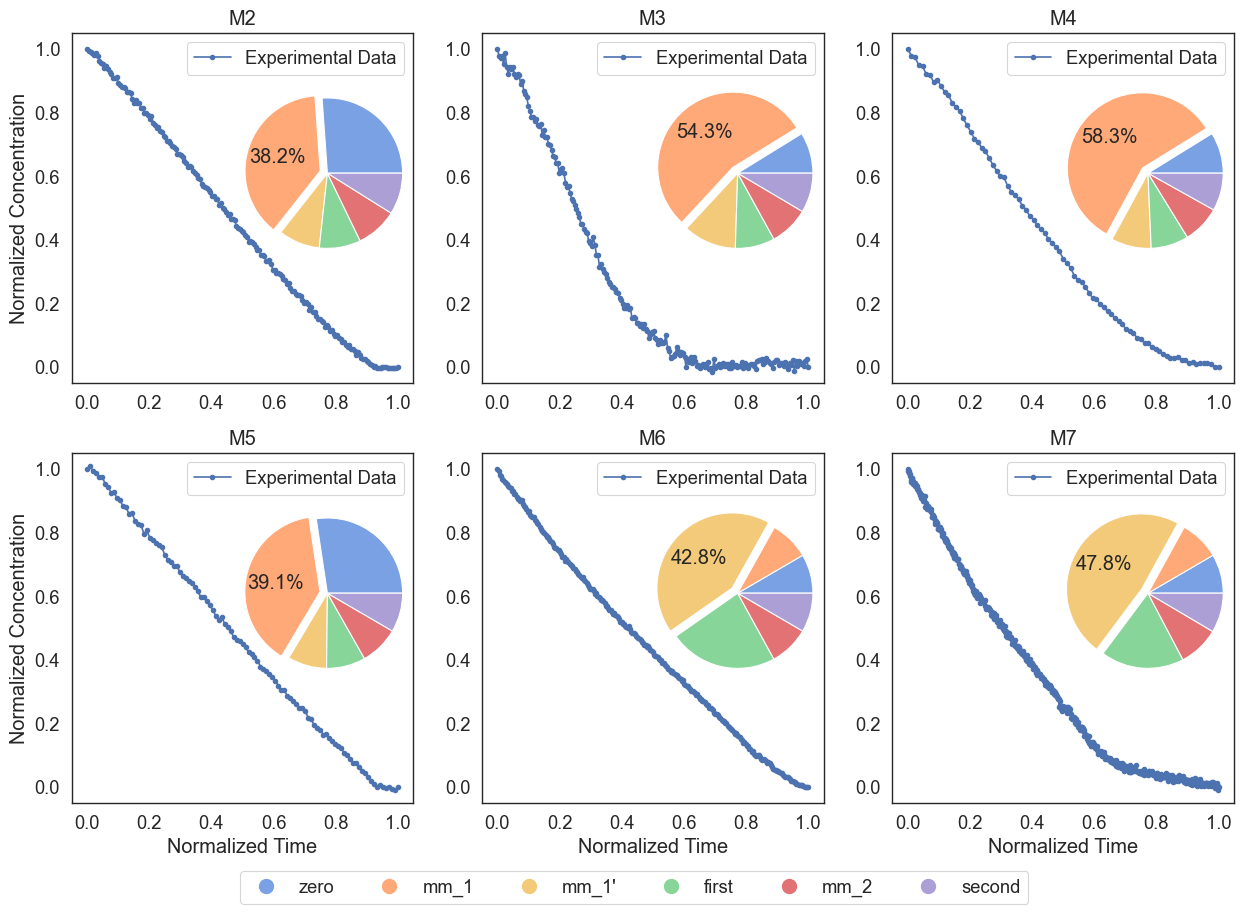

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

pie_labels = ['zero', 'mm_1', 'mm_1\'', 'first', 'mm_2', 'second']
pie_colors = ['#79A1E3', '#FFA878', '#F3CA79', '#88D59A', '#E37275', '#AB9FD6']

# 创建 2 行 3 列子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=100)
axes = axes.flatten()  # 将2D数组展平为1D，方便索引

# 曲线数据
s_conc_data = [s_conc_M2, s_conc_M3, s_conc_M4, s_conc_M5, s_conc_M6, s_conc_M7]
time_data = [time_M2, time_M3, time_M4, time_M5, time_M6, time_M7]
titles = ['M2', 'M3', 'M4', 'M5', 'M6', 'M7']

# 绘制曲线图和嵌套饼图
for i, ax in enumerate(axes):
    ax.plot(time_data[i], s_conc_data[i], label='Experimental Data', marker='o', markersize=3)
    ax.set_title(titles[i])
    ax.set_ylim(-0.05, 1.05)
    # 仅在最左侧显示 ylabel
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Normalized Concentration')

    # 仅在最后一行显示 xlabel
    if i < 3:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Normalized Time')
    ax.legend()

    # 嵌套饼图
    inset_ax = inset_axes(ax, 
                      width="55%", 
                      height="55%", 
                      loc="center right", 
                      bbox_to_anchor=(0.05, 0.1, 1, 1),
                      bbox_transform=ax.transAxes)
    inset_ax.set_facecolor('lightgrey')  # 设置嵌套区域背景色，便于定位
    explode = [0.1 if size == max(pie_data[titles[i]]) else 0 for size in pie_data[titles[i]]]
    inset_ax.pie(
        pie_data[titles[i]],
        # labels=pie_labels,
        autopct=lambda pct: autopct_only_max(pct, pie_data[titles[i]]),
        startangle=0,
        colors=pie_colors,
        explode=explode
    )
    # inset_ax.set_title(f'Predicted Probability', fontsize=10, loc='center')

fig.legend(
    handles=[plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10) for color in pie_colors],
    labels=pie_labels,
    loc='lower center',           # 图例放在底部
    bbox_to_anchor=(0.5, 0),   # 图例位置在底部中心
    ncol=6                        # 图例分成 6 列
)
# 调整布局
# plt.tight_layout()
plt.show()


In [9]:
pie_data = {}
def get_pie_data(text, key):
    text_list = [i.strip() for i in text.split() if i.strip()]
    data_keys = text_list[::2]
    data_values = text_list[1::2]
    data = {data_keys[i]: [float(data_values[i])] for i in range(len(data_keys))}
    df = pd.DataFrame(data)
    df = df[['zero', 'mm_1', 'first', 'mm_2', 'second']]
    pie_data[key] = df.iloc[0].tolist()

text = '''
mm_1
0.551 
zero
0.255 
mm_2
0.065 
first
0.065 
second
0.064 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M2')

text = '''
mm_1
0.733 
first
0.075 
mm_2
0.067 
zero
0.064 
second
0.061 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M3')

text = '''
mm_1
0.766 
zero
0.062 
first
0.058 
mm_2
0.057 
second
0.057 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M4')

text = '''
mm_1
0.680 
zero
0.137 
second
0.061 
mm_2
0.061 
first
0.061 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M5')

text = '''
first
0.744 
mm_1
0.073 
mm_2
0.066 
second
0.059 
zero
0.058 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M6')

text = '''
first
0.719 
mm_2
0.083 
mm_1
0.079 
second
0.061 
zero
0.058 
'''.replace('mm_1_out', 'mm_1\'')
get_pie_data(text, 'M7')

pie_data

{'M2': [0.255, 0.551, 0.065, 0.065, 0.064],
 'M3': [0.064, 0.733, 0.075, 0.067, 0.061],
 'M4': [0.062, 0.766, 0.058, 0.057, 0.057],
 'M5': [0.137, 0.68, 0.061, 0.061, 0.061],
 'M6': [0.058, 0.073, 0.744, 0.066, 0.059],
 'M7': [0.058, 0.079, 0.719, 0.083, 0.061]}

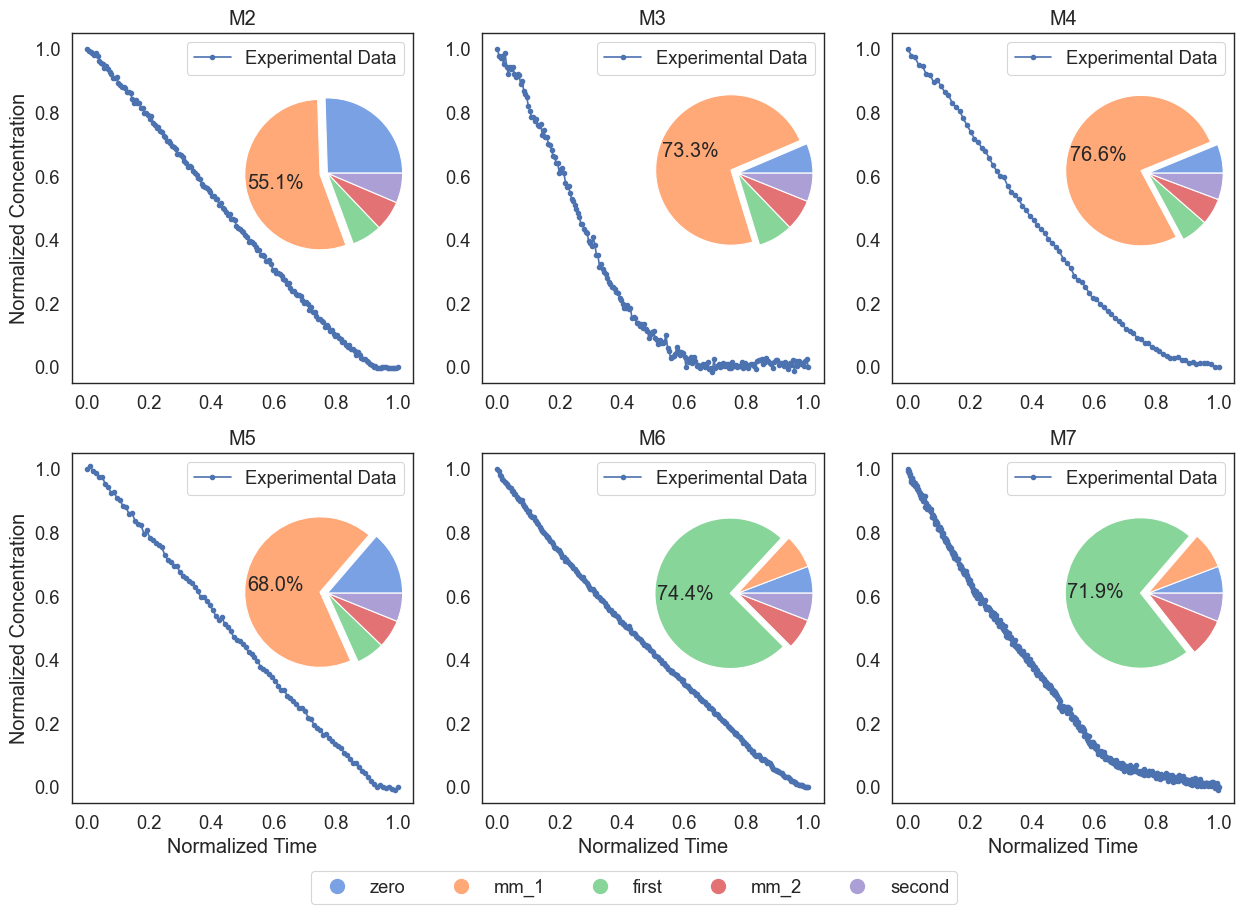

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

pie_labels = ['zero', 'mm_1', 'first', 'mm_2', 'second']
pie_colors = ['#79A1E3', '#FFA878', '#88D59A', '#E37275', '#AB9FD6']

# 创建 2 行 3 列子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=100)
axes = axes.flatten()  # 将2D数组展平为1D，方便索引

# 曲线数据
s_conc_data = [s_conc_M2, s_conc_M3, s_conc_M4, s_conc_M5, s_conc_M6, s_conc_M7]
time_data = [time_M2, time_M3, time_M4, time_M5, time_M6, time_M7]
titles = ['M2', 'M3', 'M4', 'M5', 'M6', 'M7']

# 绘制曲线图和嵌套饼图
for i, ax in enumerate(axes):
    ax.plot(time_data[i], s_conc_data[i], label='Experimental Data', marker='o', markersize=3)
    ax.set_title(titles[i])
    ax.set_ylim(-0.05, 1.05)
    # 仅在最左侧显示 ylabel
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Normalized Concentration')

    # 仅在最后一行显示 xlabel
    if i < 3:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Normalized Time')
    ax.legend()

    # 嵌套饼图
    inset_ax = inset_axes(ax, 
                      width="55%", 
                      height="55%", 
                      loc="center right", 
                      bbox_to_anchor=(0.05, 0.1, 1, 1),
                      bbox_transform=ax.transAxes)
    inset_ax.set_facecolor('lightgrey')  # 设置嵌套区域背景色，便于定位
    explode = [0.1 if size == max(pie_data[titles[i]]) else 0 for size in pie_data[titles[i]]]
    inset_ax.pie(
        pie_data[titles[i]],
        # labels=pie_labels,
        autopct=lambda pct: autopct_only_max(pct, pie_data[titles[i]]),
        startangle=0,
        colors=pie_colors,
        explode=explode
    )
    # inset_ax.set_title(f'Predicted Probability', fontsize=10, loc='center')

fig.legend(
    handles=[plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10) for color in pie_colors],
    labels=pie_labels,
    loc='lower center',           # 图例放在底部
    bbox_to_anchor=(0.5, 0),   # 图例位置在底部中心
    ncol=6                        # 图例分成 6 列
)
# 调整布局
# plt.tight_layout()
plt.show()


In [23]:
pie_data = {}
def get_pie_data(text, key):
    text_list = [i.strip() for i in text.split() if i.strip()]
    data_keys = text_list[::2]
    data_values = text_list[1::2]
    data = {data_keys[i]: [float(data_values[i])] for i in range(len(data_keys))}
    df = pd.DataFrame(data)
    df = df[['zero', 'mm_1', 'first', 'mm_2', 'second']]
    pie_data[key] = df.iloc[0].tolist()
text = '''
mm_1
0.723 
zero
0.098 
first
0.060 
mm_2
0.059 
second
0.059 
'''
get_pie_data(text, 'M1')

pie_data

{'M1': [0.098, 0.723, 0.06, 0.059, 0.059]}

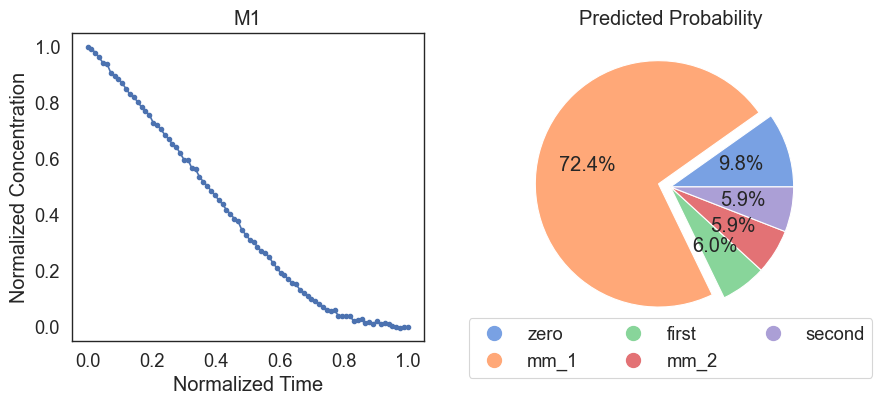

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

# 曲线数据
# ax = axes[1]
# ax = plt.plot(time_M1, s_conc_M1, label='Experimental Data', marker='o', markersize=3)
# ax.set_title('M1')
# ax.set_ylim(-0.05, 1.05)

axes[0].plot(time_M1, s_conc_M1, 
            #  label='Experimental Data', 
             marker='o', markersize=3)
axes[0].set_title('M1')
axes[0].set_xlabel('Normalized Time')
axes[0].set_ylabel('Normalized Concentration')
axes[0].set_ylim(-0.05, 1.05)


explode = [0.1 if size == max(pie_data['M1']) else 0 for size in pie_data['M1']]

axes[1].pie(
    pie_data['M1'],
    autopct='%1.1f%%',
    # autopct=lambda pct: autopct_only_max(pct, pie_data['M1']),
    startangle=0,
    colors=pie_colors,
    explode=explode
)
axes[1].set_title('Predicted Probability')
axes[1].legend(
    handles=[plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10) for color in pie_colors],
    labels=pie_labels,
    loc='lower center',           # 图例放在底部
    bbox_to_anchor=(0.5, -0.15),   # 图例位置在底部中心
    ncol=3
    )

## overlap data

In [2]:
from autogluon.tabular import TabularPredictor
random_seed = 29

class_list = [
    'zero',
    'first',
    'second',
    'mm_1',
    # 'mm_1_out',
    'mm_2',
]

ag_model_root = './AutogluonModels/'

cat_conc = 'norm_cat'
sp_mode = 's'

test_data_path = os.path.join(f'data/{cat_conc}', f'{cat_conc}_test_tsfresh_feat.csv')
test_data = pd.read_csv(test_data_path)
test_raw_data = pd.read_csv(os.path.join(f'data/{cat_conc}', f'{cat_conc}_test.csv'))
test_raw_data.drop(columns=['class'], inplace=True)
test_merge_data_sp = pd.merge(test_data, test_raw_data, on='id')
assert test_merge_data_sp.shape[0] == test_data.shape[0]
test_merge_data_s = test_merge_data_sp.drop(columns=[c for c in test_merge_data_sp.columns if c.startswith('p')])

if sp_mode == 'sp':
    test_merge_data = test_merge_data_sp
elif sp_mode == 's':
    test_merge_data = test_merge_data_s
else:
    raise ValueError('Wrong sp mode')
model_root = os.path.join(ag_model_root, f'{cat_conc}__tsfresh_raw_feat__{sp_mode}__best_quality__3h')

predictor = TabularPredictor.load(model_root)
predictor.leaderboard()

model  score_val eval_metric  pred_time_val  \
0           WeightedEnsemble_L3   0.788778    accuracy      83.246156   
1             LightGBMXT_BAG_L2   0.788467    accuracy      76.079173   
2               LightGBM_BAG_L2   0.788133    accuracy      76.004107   
3          LightGBMLarge_BAG_L2   0.787511    accuracy      76.377855   
4          LightGBM_r131_BAG_L2   0.787489    accuracy      76.044030   
5                XGBoost_BAG_L2   0.787467    accuracy      76.504684   
6            XGBoost_r33_BAG_L2   0.786133    accuracy      76.667705   
7            CatBoost_r9_BAG_L2   0.786022    accuracy      75.797027   
8         ExtraTreesEntr_BAG_L2   0.785956    accuracy      80.530410   
9           LightGBM_r96_BAG_L2   0.785622    accuracy      76.243452   
10      RandomForestEntr_BAG_L2   0.785533    accuracy      80.298996   
11      RandomForestGini_BAG_L2   0.785089    accuracy      80.395761   
12        ExtraTreesGini_BAG_L2   0.785089    accuracy      80.479186   
13          WeightedEnsemble_L2   0.785044    accuracy      20.096224   
14              CatBoost_BAG_L2   0.783889    accuracy      75.751168   
15       NeuralNetFastAI_BAG_L2   0.783733    accuracy      76.116129   
16  NeuralNetFastAI_r191_BAG_L2   0.783667    accuracy      76.401003   
17         CatBoost_r177_BAG_L2   0.783400    accuracy      75.754836   
18        NeuralNetTorch_BAG_L2   0.782044    accuracy      77.564497   
19    NeuralNetTorch_r79_BAG_L2   0.781756    accuracy      77.585476   
20         LightGBMLarge_BAG_L1   0.781622    accuracy       3.613058   
21    NeuralNetTorch_r22_BAG_L2   0.780933    accuracy      77.628596   
22        ExtraTrees_r42_BAG_L2   0.780733    accuracy      77.139729   
23         CatBoost_r137_BAG_L2   0.779400    accuracy      75.743116   
24         LightGBM_r131_BAG_L1   0.779289    accuracy       7.133780   
25          LightGBM_r96_BAG_L1   0.779111    accuracy      21.388524   
26            LightGBMXT_BAG_L1   0.778133    accuracy       3.298458   
27               XGBoost_BAG_L1   0.777711    accuracy       1.210293   
28              LightGBM_BAG_L1   0.777511    accuracy       1.814051   
29      RandomForestEntr_BAG_L1   0.775489    accuracy       3.986238   
30      RandomForestGini_BAG_L1   0.774578    accuracy       4.046390   
31           CatBoost_r9_BAG_L1   0.772578    accuracy       0.175199   
32         CatBoost_r177_BAG_L1   0.771356    accuracy       0.146464   
33              CatBoost_BAG_L1   0.771111    accuracy       0.140519   
34        ExtraTreesGini_BAG_L1   0.770089    accuracy       4.096087   
35        ExtraTreesEntr_BAG_L1   0.768867    accuracy       4.098379   
36        NeuralNetTorch_BAG_L1   0.766467    accuracy       1.259388   
37    NeuralNetTorch_r22_BAG_L1   0.764933    accuracy       1.298126   
38           XGBoost_r33_BAG_L1   0.762044    accuracy       0.694321   
39    NeuralNetTorch_r79_BAG_L1   0.761089    accuracy       1.276760   
40       NeuralNetFastAI_BAG_L1   0.755156    accuracy       0.457642   
41  NeuralNetFastAI_r191_BAG_L1   0.753111    accuracy       0.687204   
42        KNeighborsDist_BAG_L1   0.609244    accuracy       7.355232   
43        KNeighborsUnif_BAG_L1   0.607089    accuracy       7.443603   

       fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0   5903.853377                0.002692           1.711158            3   
1   5380.136173                0.459459          62.157198            2   
2   5403.556016                0.384393          85.577041            2   
3   5601.761229                0.758141         283.782254            2   
4   5421.044511                0.424316         103.065536            2   
5   5425.219345                0.884969         107.240371            2   
6   5497.354778                1.047991         179.375804            2   
7   5869.501696                0.177313         551.522721            2   
8   5322.035858                4.910695           4.056883       

In [3]:
test_merge_data_nolabel = test_merge_data.drop(columns=['class'])
y_test = test_merge_data['class']
y_pred = predictor.predict(test_merge_data_nolabel)
y_proba = predictor.predict_proba(test_merge_data_nolabel)

In [13]:
import numpy as np
sorted_indices = np.argsort(y_proba, axis=1)[:, ::-1]
indice2class = {i: y_proba.columns[i] for i in range(len(y_proba.columns))}
class2indice = {v: k for k, v in indice2class.items()}
sorted_classes = np.vectorize(lambda x: indice2class[x])(sorted_indices)
sorted_classes


array([['first', 'mm_2', 'second', 'mm_1', 'zero'],
       ['first', 'mm_1', 'mm_2', 'second', 'zero'],
       ['mm_1', 'first', 'mm_2', 'second', 'zero'],
       ...,
       ['zero', 'second', 'mm_2', 'mm_1', 'first'],
       ['zero', 'mm_1', 'mm_2', 'second', 'first'],
       ['zero', 'mm_1', 'mm_2', 'second', 'first']], dtype='<U6')

In [19]:

df_test = pd.DataFrame(columns=['id', 'class', 'pred_1st', 'proba_1st', 'pred_2nd', 'proba_2nd', 'pred_3rd', 'proba_3rd'])
df_test['id'] = test_merge_data['id']
df_test['class'] = y_test
df_test['pred_1st'] = y_pred
df_test['proba_1st'] = y_proba.max(axis=1)
df_test['proba_1st'] = df_test['proba_1st'].round(3)
df_test['pred_2nd'] = sorted_classes[:, 1]
df_test['proba_2nd'] = y_proba.apply(lambda x: sorted(x)[-2], axis=1)
df_test['proba_2nd'] = df_test['proba_2nd'].round(3)
df_test['pred_3rd'] = sorted_classes[:, 2]
df_test['proba_3rd'] = y_proba.apply(lambda x: sorted(x)[-3], axis=1)
df_test['proba_3rd'] = df_test['proba_3rd'].round(3)
df_test['correct'] = df_test['class'] == df_test['pred_1st']
df_test


id  class pred_1st  proba_1st pred_2nd  proba_2nd  \
0     first-0__double-10024  first    first      0.645     mm_2      0.141   
1     first-0__double-10076  first    first      0.696     mm_1      0.113   
2     first-0__double-10113  first     mm_1      0.399    first      0.344   
3     first-0__double-10115  first    first      0.404     mm_1      0.401   
4     first-0__double-10182  first   second      0.365     mm_2      0.360   
...                     ...    ...      ...        ...      ...        ...   
4995    zero-0__single-9938   zero     zero      0.762     mm_2      0.071   
4996    zero-0__single-9959   zero     zero      0.669     mm_1      0.154   
4997    zero-0__single-9982   zero     zero      0.778   second      0.056   
4998    zero-0__single-9989   zero     zero      0.531     mm_1      0.288   
4999    zero-0__single-9993   zero     zero      0.646     mm_1      0.175   

     pred_3rd  proba_3rd  correct  
0      second      0.097     True  
1        mm_2      0.071     True  
2        mm_2      0.103    False  
3        mm_2      0.071     True  
4       first      0.147    False  
...       ...        ...      ...  
4995     mm_1      0.056     True  
4996   second      0.059     True  
4997     mm_2      0.056     True  
4998     mm_2      0.060     True  
4999     mm_2      0.060     True  

[5000 rows x 9 columns]

In [529]:
df_ = df_test[df_test['correct'] 
        & (df_test['class'] == 'mm_1')
        # & ((df_test['class'] == 'mm_1') | (df_test['class'] == 'first'))
        # & (df_test['proba_1st'] < 0.5)
        & (df_test['proba_1st'] - df_test['proba_2nd'] > 0.5)
        # & (df_test['pred_2nd'] == 'mm_1')
        ]
df_

id class pred_1st  proba_1st pred_2nd  proba_2nd  \
1000  mm_1-mm__single-10000  mm_1     mm_1      0.775     zero      0.057   
1001  mm_1-mm__single-10020  mm_1     mm_1      0.777     mm_2      0.056   
1003  mm_1-mm__single-10037  mm_1     mm_1      0.687    first      0.111   
1007   mm_1-mm__single-1007  mm_1     mm_1      0.728    first      0.094   
1010  mm_1-mm__single-10093  mm_1     mm_1      0.710    first      0.103   
...                     ...   ...      ...        ...      ...        ...   
1991    mm_1-mm__single-993  mm_1     mm_1      0.775     zero      0.057   
1993   mm_1-mm__single-9954  mm_1     mm_1      0.768    first      0.060   
1996    mm_1-mm__single-998  mm_1     mm_1      0.753    first      0.071   
1997   mm_1-mm__single-9985  mm_1     mm_1      0.719    first      0.086   
1999   mm_1-mm__single-9991  mm_1     mm_1      0.769    first      0.062   

     pred_3rd  proba_3rd  correct  
1000     mm_2      0.056     True  
1001    first      0.056     True  
1003     mm_2      0.079     True  
1007     mm_2      0.064     True  
1010     mm_2      0.070     True  
...       ...        ...      ...  
1991     mm_2      0.056     True  
1993     mm_2      0.059     True  
1996     mm_2      0.062     True  
1997     mm_2      0.079     True  
1999     mm_2      0.057     True  

[514 rows x 9 columns]

In [470]:
def draw_fig(data_id, raw_data, sp_mode, legend=False, title=False, alpha=0.1, color='blue'):
    if sp_mode == 'sp':
        y_1 = raw_data[raw_data['id'] == data_id].iloc[:, 1:31].values[0]
        y_2 = raw_data[raw_data['id'] == data_id].iloc[:, 31:].values[0]
        # cat_conc = raw_data[raw_data['id'] == data_id].iloc[:, 1].values[0]
        x = np.arange(1, 31)
        plt.plot(x, y_1, label='s')
        plt.plot(x, y_2, label='p')
        plt.ylim(-0.05, 1.05)
        if title:
            plt.title(f'{data_id}')
        if legend:
            plt.legend()
        # plt.show()
    elif sp_mode == 's':
        y = raw_data[raw_data['id'] == data_id].iloc[:, 1:31].values[0]
        # cat_conc = raw_data[raw_data['id'] == data_id].iloc[:, 1].values[0]
        x = np.arange(1, 31)/31
        plt.plot(x, y, alpha=alpha, color=color)
        plt.ylim(-0.05, 1.05)
        plt.xticks([0, 1])
        plt.yticks([0, 1])
        plt.xlabel('Normalized Time')
        plt.ylabel('Normalized Concentration [S]')
        if title:
            plt.title(f'{data_id}')

64
['mm_1-mm__single-3968' 'mm_1-mm__single-7672' 'mm_1-mm__single-4772'
 'mm_1-mm__single-3810' 'mm_1-mm__single-10172' 'mm_1-mm__single-228'
 'mm_1-mm__single-3614' 'mm_1-mm__single-7520' 'mm_1-mm__single-940'
 'mm_1-mm__single-3744']


Text(0.5, 1.0, 'only mm_1')

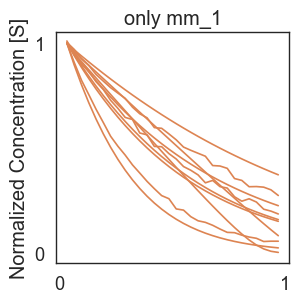

In [531]:
import random
random_seed = random.randint(0, 100)
random_seed = 64
df_random = df_.sample(10, random_state=random_seed)
print(random_seed)
plt.figure(figsize=(3, 3))
for i, r in df_random.iterrows():
    draw_fig(
        r['id'], 
        test_raw_data, 
        sp_mode, 
        legend=False, 
        title=False,
        alpha=1,
        color='#dd8452'
    )
# plt.legend(df_random['id'])
print(df_random['id'].values)
plt.xlabel('')
plt.title('only mm_1')

158
['first-1__single-8020' 'first-0__double-10532'
 'first-0__double_outside-3649' 'first-1__single-4743'
 'first-0__double_outside-13253' 'first-1__single-3975'
 'first-0__double-4261' 'first-1__single-1518'
 'first-0__double_outside-15760' 'first-0__double_outside-2265']


Text(0.5, 1.0, 'only first')

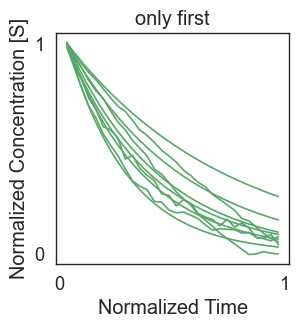

In [ ]:
import random
random_seed = random.randint(0, 500)
# random_seed = 158
df_random = df_.sample(10, random_state=random_seed)
print(random_seed)
plt.figure(figsize=(3, 3))
for i, r in df_random.iterrows():
    draw_fig(
        r['id'], 
        test_raw_data, 
        sp_mode, 
        legend=False, 
        title=False,
        alpha=1,
        color='#55a868'
    )
# plt.legend(df_random['id'])
print(df_random['id'].values)
plt.title('only first')

33
90


Text(0.5, 1.0, 'mm_1 or first')

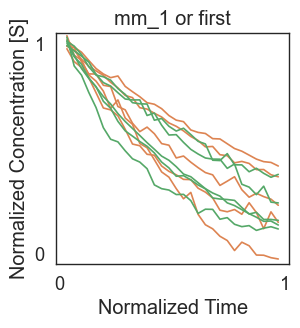

In [387]:
import random
random_seed = random.randint(0, 100)
random_seed = 33
print(random_seed)
df_random_mm1 = df_[df_['class'] == 'mm_1'].sample(5, random_state=random_seed)
random_seed = random.randint(0, 100)
random_seed = 90
print(random_seed)
df_random_first = df_[df_['class'] == 'first'].sample(5, random_state=random_seed)

plt.figure(figsize=(3, 3))
for i, r in df_random_mm1.iterrows():
    draw_fig(
        r['id'], 
        test_raw_data, 
        sp_mode, 
        legend=False, 
        title=False,
        alpha=1,
        color='#dd8452'
    )
for i, r in df_random_first.iterrows():
    draw_fig(
        r['id'], 
        test_raw_data, 
        sp_mode, 
        legend=False, 
        title=False,
        alpha=1,
        color='#55a868'
    )
plt.title('mm_1 or first')

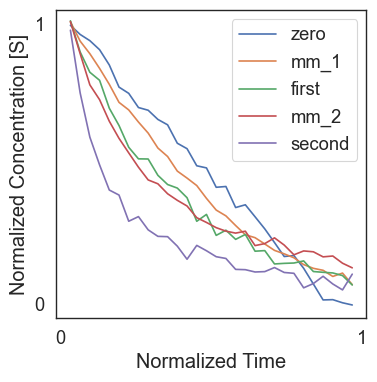

In [253]:
plt.figure(figsize=(4, 4))

draw_fig(
    data_id='zero-0__single-9921',
    raw_data=test_raw_data,
    sp_mode=sp_mode,
    legend=True,
    title=False,
    alpha=1
)
draw_fig(
    data_id='mm_1-mm__single-3209',
    raw_data=test_raw_data,
    sp_mode=sp_mode,
    legend=True,
    title=False,
    alpha=1
)

draw_fig(
    data_id='first-0__double_outside-8060',
    raw_data=test_raw_data,
    sp_mode=sp_mode,
    legend=True,
    title=False,
    alpha=1
)

draw_fig(
    data_id='mm_2-mm__double_inside-1296',
    raw_data=test_raw_data,
    sp_mode=sp_mode,
    legend=True,
    title=False,
    alpha=1
)

draw_fig(
    data_id='second-1__double_outside-1082',
    raw_data=test_raw_data,
    sp_mode=sp_mode,
    legend=True,
    title=False,
    alpha=1
)

plt.legend(['zero', 'mm_1', 'first', 'mm_2', 'second'])

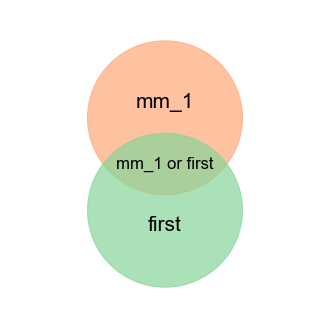

In [482]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# 创建画布
fig, ax = plt.subplots(figsize=(4, 4))

# 定义两个圆的参数
circle1 = Circle((0.5, 0.65), 0.25, color='#FFA878', alpha=0.7, label='mm_1')  # 圆心在 (0.4, 0.5)，半径 0.3
circle2 = Circle((0.5, 0.35), 0.25, color='#88D59A', alpha=0.7, label='first')   # 圆心在 (0.6, 0.5)，半径 0.3

# 添加圆到图像中
ax.add_patch(circle1)
ax.add_patch(circle2)

ax.text(0.5, 0.7, 'mm_1', color='black', ha='center', va='center', fontsize=15)  # 圆心 (0.5, 0.65)
ax.text(0.5, 0.3, 'first', color='black', ha='center', va='center', fontsize=15)  # 圆心 (0.5, 0.35)
ax.text(0.5, 0.5, 'mm_1 or first', color='black', ha='center', va='center', fontsize=12)  # 圆心 (0.5, 0.35)

# 设置图像范围和比例
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
ax.axis('off')
plt.show()


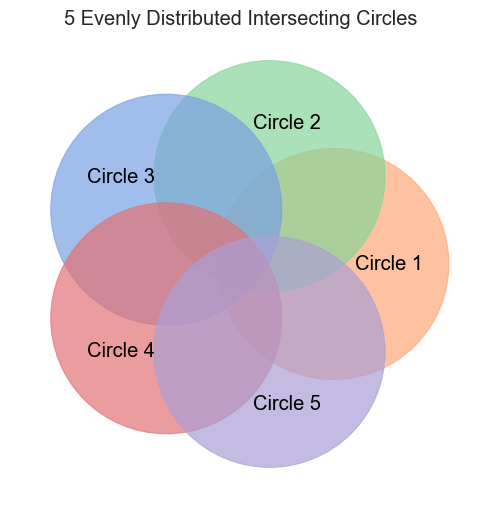

In [499]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# 创建画布
fig, ax = plt.subplots(figsize=(6, 6))

# 圆的总数
n_circles = 5
radius = 0.25  # 每个圆的半径

# 五边形的顶点坐标计算
angles = np.linspace(0, 2 * np.pi, n_circles, endpoint=False)
circle_centers = [(0.5 + 0.2 * np.cos(angle), 0.5 + 0.2 * np.sin(angle)) for angle in angles]
text_circle_centers = [(0.5 + 0.32 * np.cos(angle), 0.5 + 0.32 * np.sin(angle)) for angle in angles]


# 圆的颜色
colors = ['#FFA878', '#88D59A', '#79A1E3', '#E37275', '#AB9FD6']

# 绘制圆
for i, (center, color) in enumerate(zip(circle_centers, colors)):
    circle = Circle(center, radius, color=color, alpha=0.7, label=f'Circle {i+1}')
    ax.add_patch(circle)
    # 添加圆心标签
    ax.text(text_circle_centers[i][0], text_circle_centers[i][1], f'Circle {i+1}', color='black', ha='center', va='center')

# 设置图像范围和比例
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')  # 保持比例
ax.axis('off')  # 去掉边框

# 添加图例
# ax.legend(loc='upper right')

# 显示图像
plt.title('5 Evenly Distributed Intersecting Circles')
plt.show()


## chord diagram

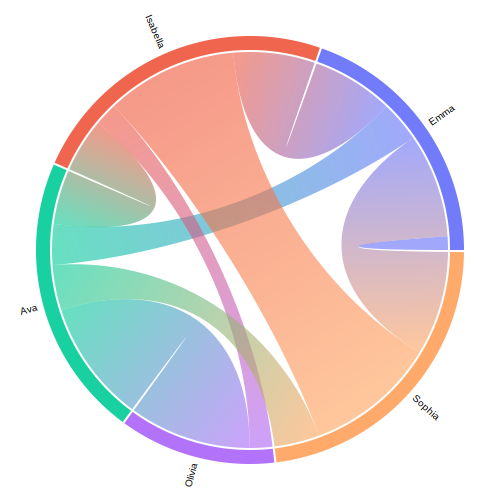

In [537]:
import openchord as ocd

adjacency_matrix = [[ 3, 18,  9,  0, 23],
                    [18,  0, 12,  5, 29],
                    [ 9, 12,  0, 27, 10],
                    [ 0,  5, 27,  0,  0],
                    [23, 29, 10,  0,  0]]
labels = ['Emma', 'Isabella', 'Ava', 'Olivia', 'Sophia']

fig = ocd.Chord(adjacency_matrix, labels)
fig.colormap = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
# fig.show()
fig.show()